In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



In [5]:
df = pd.read_csv(r"C:\Users\divij\OneDrive\Desktop\credit risk project\data\german_credit_clean.csv")

df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.columns


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [7]:
df['Risk'] = df['Risk'].map({'good': 0, 'bad': 1})

df['Risk'].value_counts()


Risk
0    700
1    300
Name: count, dtype: int64

In [8]:
df.isnull().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')


In [10]:
df.isnull().sum()


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [11]:
df.dtypes


Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                 int64
dtype: object

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,22,2,5951,48,1,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,49,1,2096,12,0,True,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,45,2,7882,42,0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,53,2,4870,24,1,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [13]:
df_encoded.shape


(1000, 22)

In [18]:
from sklearn.preprocessing import StandardScaler

# Define X and y
X = df_encoded.drop("Risk", axis=1)
y = df_encoded["Risk"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Scale features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.755

Confusion Matrix:
 [[127  14]
 [ 35  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       141
           1       0.63      0.41      0.49        59

    accuracy                           0.76       200
   macro avg       0.71      0.65      0.67       200
weighted avg       0.74      0.76      0.74       200



In [19]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coefficients.sort_values(by="Coefficient", ascending=False).head(10)


,Feature,Coefficient
3,Duration,0.336985
16,Purpose_education,0.107818
2,Credit amount,0.089957
1,Job,0.084260
19,Purpose_repairs,0.032559
15,Purpose_domestic appliances,0.002063
7,Saving accounts_moderate,-0.000130
20,Purpose_vacation/others,-0.019792
14,Purpose_car,-0.023574
6,Housing_rent,-0.078184


In [25]:
import pandas as pd

# Create DataFrame of coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

# Sort by absolute value or by positive impact — both are useful
# Option 1: strongest positive coefficients (features that strongly increase default risk)
print("Top features that INCREASE default probability:")
print(coefficients.sort_values(by="Coefficient", ascending=False).head(10))

# Option 2: strongest absolute coefficients (most influential overall)
print("\nMost influential features (by absolute coefficient):")
print(coefficients.assign(Abs_Coefficient=abs(coefficients["Coefficient"]))
                .sort_values(by="Abs_Coefficient", ascending=False)
                .head(10)[["Feature", "Coefficient", "Abs_Coefficient"]])

Top features that INCREASE default probability:
                        Feature  Coefficient
3                      Duration     0.336985
16            Purpose_education     0.107818
2                 Credit amount     0.089957
1                           Job     0.084260
19              Purpose_repairs     0.032559
15  Purpose_domestic appliances     0.002063
7      Saving accounts_moderate    -0.000130
20      Purpose_vacation/others    -0.019792
14                  Purpose_car    -0.023574
6                  Housing_rent    -0.078184

Most influential features (by absolute coefficient):
                      Feature  Coefficient  Abs_Coefficient
13   Checking account_unknown    -0.818247         0.818247
3                    Duration     0.336985         0.336985
0                         Age    -0.329755         0.329755
5                 Housing_own    -0.273604         0.273604
12      Checking account_rich    -0.243639         0.243639
18           Purpose_radio/TV    -0.242760 

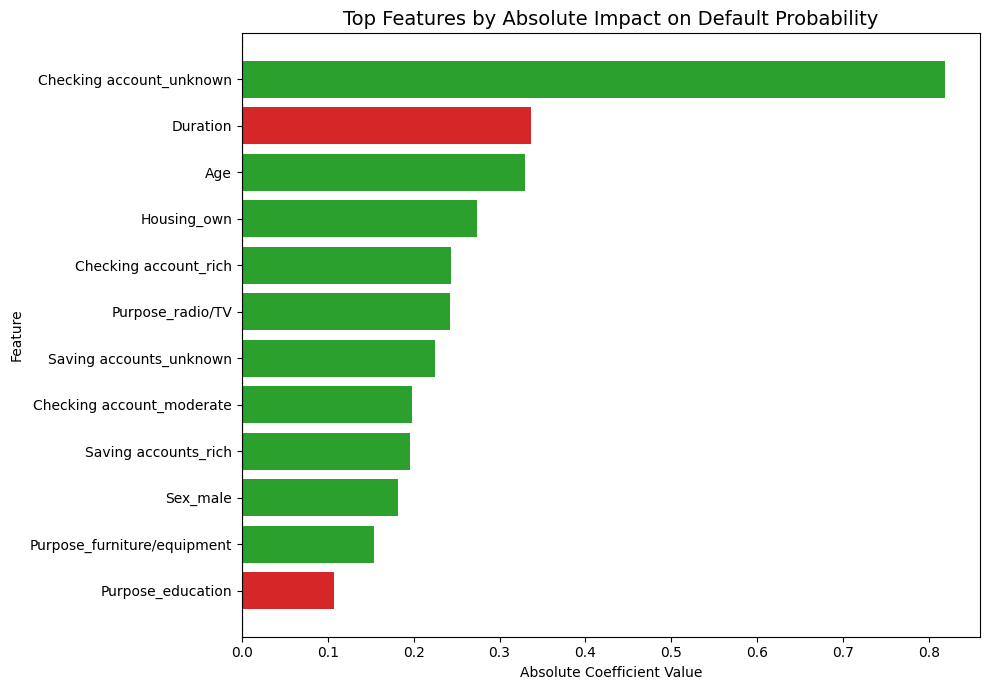

In [28]:
plt.figure(figsize=(10, 7))

# Sort descending by abs value
coef_plot = coefficients.assign(Abs_Coefficient=abs(coefficients["Coefficient"])) \
                        .sort_values("Abs_Coefficient", ascending=False).head(12)

# Colors: red for positive (risk-increasing), green for negative (protective)
colors = ['#d62728' if coef > 0 else '#2ca02c' for coef in coef_plot["Coefficient"]]

plt.barh(coef_plot["Feature"], coef_plot["Abs_Coefficient"], color=colors)
plt.axvline(0, color='black', lw=0.8, linestyle='--')

plt.title("Top Features by Absolute Impact on Default Probability", fontsize=14)
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # highest impact on top
plt.tight_layout()
plt.show()

In [29]:
plt.savefig("top_features_credit_risk.png", dpi=300, bbox_inches="tight")
print("Plot saved as 'top_features_credit_risk.png'")

Plot saved as 'top_features_credit_risk.png'


<Figure size 640x480 with 0 Axes>

In [33]:
from sklearn.preprocessing import StandardScaler

# Scale the features (this usually fixes convergence issues)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   # important: transform test set with same scaler

# Now retrain the balanced model on scaled data
model_bal = LogisticRegression(
    class_weight='balanced',
    max_iter=5000,          # much higher to allow full convergence
    random_state=42,
    solver='lbfgs'
)

model_bal.fit(X_train_scaled, y_train)

print("Balanced model (scaled + more iterations) training completed.")
print("Number of iterations actually used:", model_bal.n_iter_[0])

Balanced model (scaled + more iterations) training completed.
Number of iterations actually used: 13


In [34]:
from sklearn.metrics import accuracy_score

# Make predictions using the balanced model on scaled test data
y_pred_bal = model_bal.predict(X_test_scaled)

# Calculate and print accuracy
acc_bal = accuracy_score(y_test, y_pred_bal)
print(f"Balanced model accuracy on test set: {acc_bal:.4f}")
print(f"(Original model was ~0.7550 for comparison)")

Balanced model accuracy on test set: 0.6800
(Original model was ~0.7550 for comparison)


In [35]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix for Balanced Model:")
print(confusion_matrix(y_test, y_pred_bal))

Confusion Matrix for Balanced Model:
[[99 42]
 [22 37]]
